In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

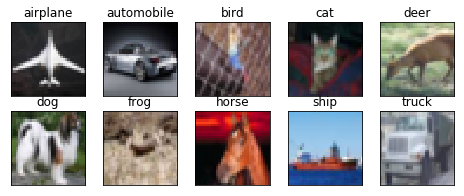

In [158]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [162]:
print(num_classes)

10


In [163]:
import keras
from keras import regularizers
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Input
from keras.utils import plot_model
from keras.models import Model
# from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.pooling import MaxPooling2D

visible = Input(shape=(32,32,3))

#Normal Convolution

conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible)#30
conv1= BatchNormalization()(conv1)
conv1= Dropout(0.15)(conv1)

#Depth wise Convolution 

conv2=DepthwiseConv2D(kernel_size=3, activation='relu')(conv1)#28
conv2= Dropout(0.15)(conv2)
conv2= BatchNormalization()(conv2)

#Transition Layer

conv3 = Conv2D(16, kernel_size=1, activation='relu')(conv2) #28
pool1 = MaxPooling2D(pool_size=(2, 2))(conv3) #14

#Separable Convolution (3x1 followed by 1x3)

conv4 = Conv2D(64, kernel_size=(3,1), activation='relu')(pool1) #28x26
#conv4= BatchNormalization()(pool1)
#conv4= Dropout(0.15)(pool1)

conv5 = Conv2D(32, kernel_size=(1,3), activation='relu')(conv4) #26x26
#conv5= BatchNormalization()(conv4)
#conv5= Dropout(0.15)(conv4)

#Grouped Convolution (use 3x3, 5x5 only)

conv6 = Conv2D(64, kernel_size=3, activation='relu',padding='SAME')(conv5) #12
conv6= BatchNormalization()(conv5)
conv6= Dropout(0.15)(conv5)

conv7 = Conv2D(32, kernel_size=5, activation='relu',padding='SAME')(conv5) #12
conv7= BatchNormalization()(conv5)
conv7= Dropout(0.15)(conv5)

added = keras.layers.Add()([conv6, conv7]) #12

#Transition Layer

conv8 = Conv2D(16, kernel_size=1, activation='relu')(added) #12
pool2 = MaxPooling2D(pool_size=(2, 2))(conv8) #6


#Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

conv9 = Conv2D(32, kernel_size=3,dilation_rate=(1, 1), activation='relu',padding='SAME')(pool2) #6
conv9= BatchNormalization()(conv9)
conv9= Dropout(0.15)(conv9)

conv10 = Conv2D(32, kernel_size=3,dilation_rate=(2, 2), activation='relu',padding='SAME')(pool2) #6
conv10== BatchNormalization()(conv10)
conv10= Dropout(0.15)(conv10)

added2 = keras.layers.Add()([conv9, conv10]) #6


conv11 = Conv2D(16, kernel_size=3, activation='relu')(added2) #4

conv12 = Conv2D(num_classes, kernel_size=4, activation='relu')(conv11) #1

flat = Flatten()(conv12)
output = Activation('softmax')(flat)
model = Model(inputs=visible, outputs=output)
 
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

#summarize layers
print(model.summary())

#plot graph
plot_model(model, to_file='model_plot.jpg', show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_281 (Conv2D)             (None, 30, 30, 64)   1792        input_42[0][0]                   
__________________________________________________________________________________________________
batch_normalization_265 (BatchN (None, 30, 30, 64)   256         conv2d_281[0][0]                 
__________________________________________________________________________________________________
dropout_221 (Dropout)           (None, 30, 30, 64)   0           batch_normalization_265[0][0]    
__________________________________________________________________________________________________
depthwise_

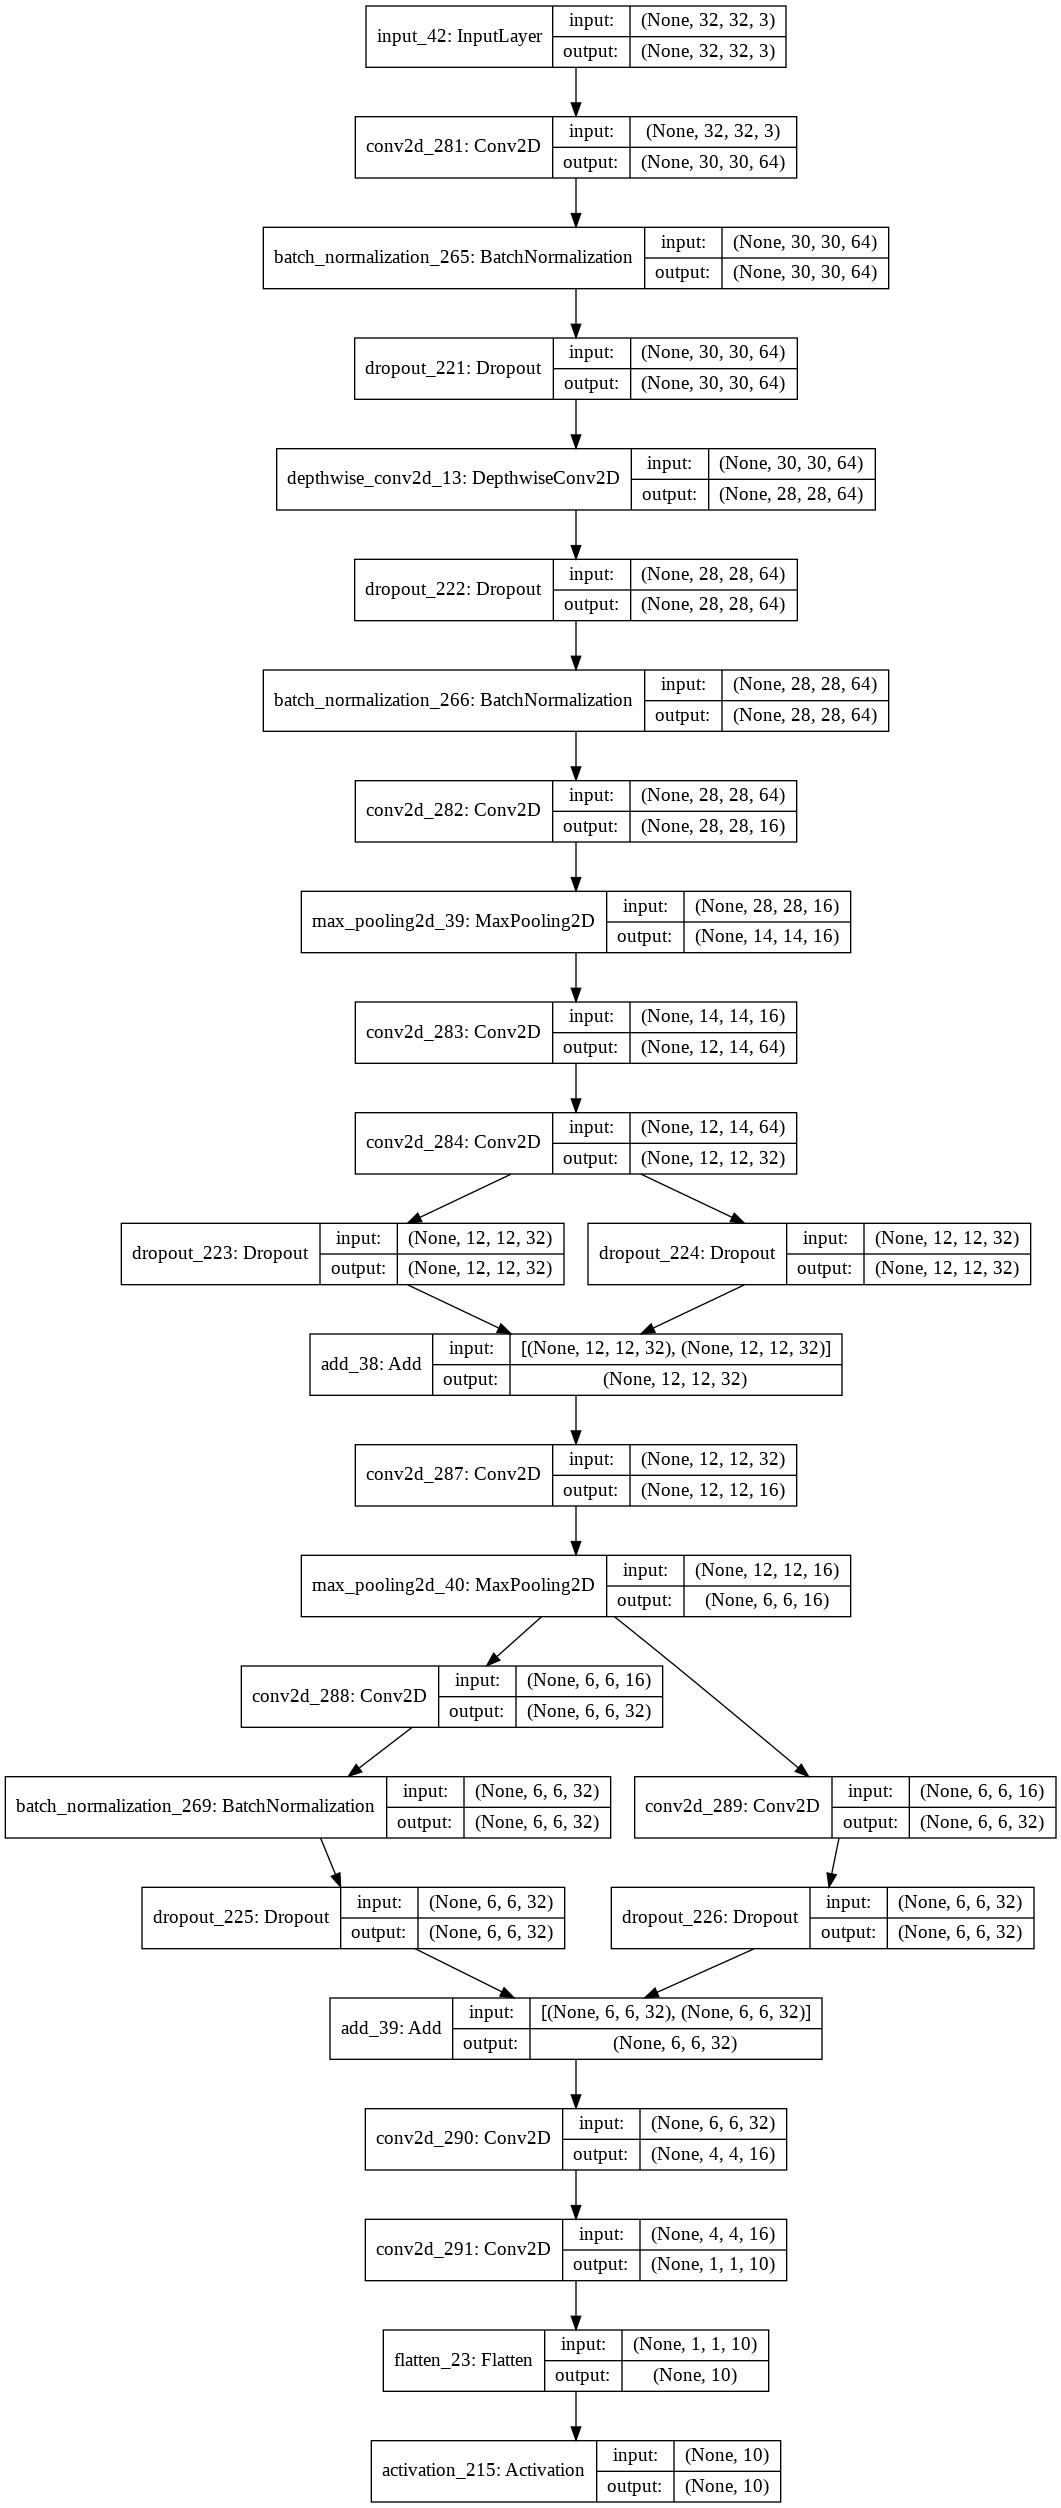

In [164]:
from IPython.display import Image, display
display(Image('model_plot.jpg'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=75)`


Epoch 1/75

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 24s 61ms/step - loss: 1.6761 - acc: 0.3862 - val_loss: 3.0692 - val_acc: 0.2108

Epoch 00001: val_acc improved from -inf to 0.21080, saving model to model_accuracy.best.hdf5
Epoch 2/75

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 16s 41ms/step - loss: 1.3423 - acc: 0.5164 - val_loss: 1.9503 - val_acc: 0.3856

Epoch 00002: val_acc improved from 0.21080 to 0.38560, saving model to model_accuracy.best.hdf5
Epoch 3/75

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 16s 41ms/step - loss: 1.1782 - acc: 0.5794 - val_loss: 1.2351 - val_acc: 0.5720

Epoch 00003: val_acc improved from 0.38560 to 0.57200, saving model to model_accuracy.best.hdf5
Epoch 4/75

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
390/390 [==================

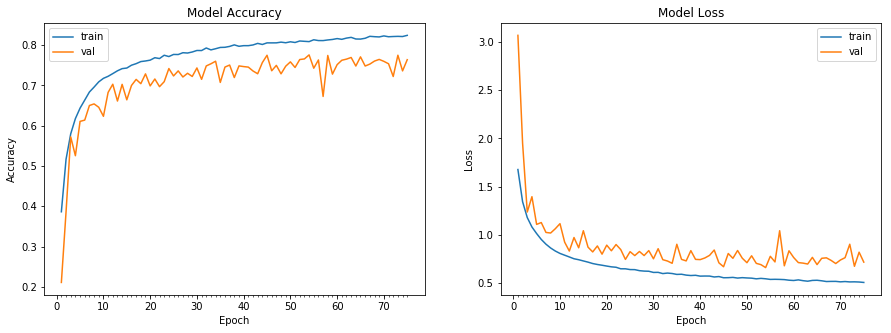

Accuracy on test data is: 76.36


In [165]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# Accuracy on test data is: 83.88
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Accuracy on test data is: 83.48
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

filepath="model_accuracy.best.hdf5"

reduce_LR = LearningRateScheduler(lr_schedule, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                callbacks=[reduce_LR, checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))